# Salary Dataset with 14 independent & 1 dependent feature


## Target: Find the maximum accuracy that can be achieved

## Approach:
1. Encode
2. Normalize
3. Visualize
4. PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.shape

(32561, 15)

In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
df[df == '?'] = np.nan

In [6]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [7]:
for col in df.columns[df.isnull().sum() != 0].tolist():
    df[col].fillna(df[col].mode()[0], inplace = True)

In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### Encode

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
for col in df.columns.tolist():
    vals = df[col].unique().tolist()
    print(
        f'''
        Column: {col}
        Sample: {vals[0:5]}
        Unique: {len(vals)}
        '''
    )


        Column: age
        Sample: [90, 82, 66, 54, 41]
        Unique: 73
        

        Column: workclass
        Sample: ['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc', 'Self-emp-inc']
        Unique: 8
        

        Column: fnlwgt
        Sample: [77053, 132870, 186061, 140359, 264663]
        Unique: 21648
        

        Column: education
        Sample: ['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate']
        Unique: 16
        

        Column: education.num
        Sample: [9, 10, 4, 6, 16]
        Unique: 16
        

        Column: marital.status
        Sample: ['Widowed', 'Divorced', 'Separated', 'Never-married', 'Married-civ-spouse']
        Unique: 7
        

        Column: occupation
        Sample: ['Prof-specialty', 'Exec-managerial', 'Machine-op-inspct', 'Other-service', 'Adm-clerical']
        Unique: 14
        

        Column: relationship
        Sample: ['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative', 'Husband']

In [11]:
encode_cols = [
    'workclass',
    'education',
    'marital.status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native.country'
]

In [12]:
for col in encode_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [13]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,<=50K
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,<=50K
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38,<=50K
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,<=50K
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,<=50K


### Normalize

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
x = df.drop('income', axis = 'columns')

In [16]:
x.shape

(32561, 14)

In [17]:
x.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38


In [18]:
y = df['income']

In [19]:
y.shape

(32561,)

In [20]:
y.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

In [21]:
x = pd.DataFrame(StandardScaler().fit_transform(x), columns = x.columns)

In [22]:
x.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,3.769612,-0.085296,-1.067997,0.181332,-0.420060,2.249480,0.720237,-0.277805,0.393668,-1.422331,-0.14592,10.593507,-0.035429,0.26137
1,3.183112,-0.085296,-0.539169,0.181332,-0.420060,2.249480,-0.790092,-0.277805,0.393668,-1.422331,-0.14592,10.593507,-1.817204,0.26137
2,2.010110,-0.085296,-0.035220,1.214869,-0.031360,2.249480,0.720237,1.589322,-1.962621,-1.422331,-0.14592,10.593507,-0.035429,0.26137
3,1.130359,-0.085296,-0.468215,-1.368974,-2.363558,-1.734058,-0.034928,1.589322,0.393668,-1.422331,-0.14592,9.461864,-0.035429,0.26137
4,0.177296,-0.085296,0.709482,1.214869,-0.031360,1.585557,0.720237,0.966947,0.393668,-1.422331,-0.14592,9.461864,-0.035429,0.26137


### Visualize

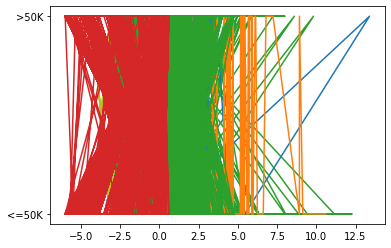

In [23]:
for col in x.columns.tolist():
    plt.plot(x[col], y)

In [24]:
# (wtf is this)

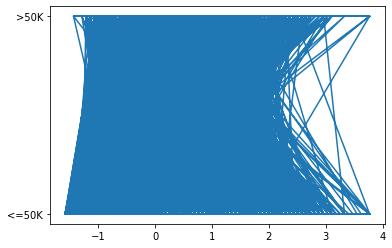

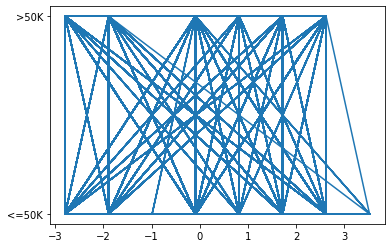

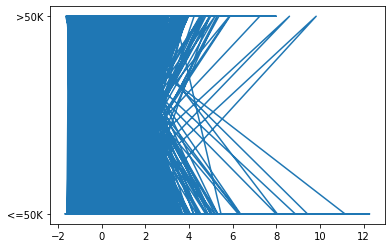

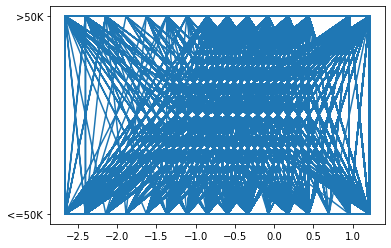

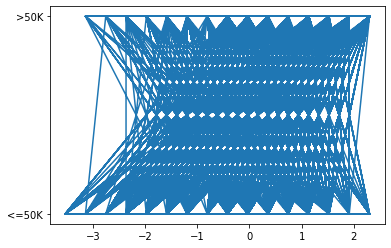

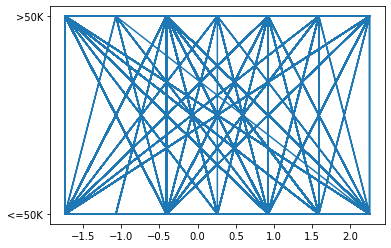

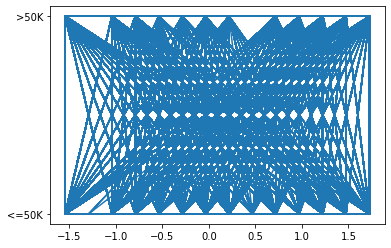

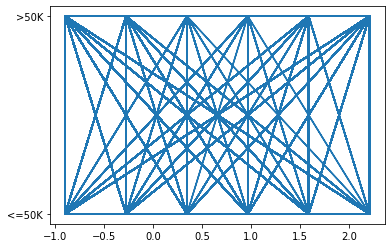

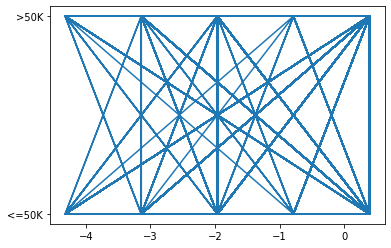

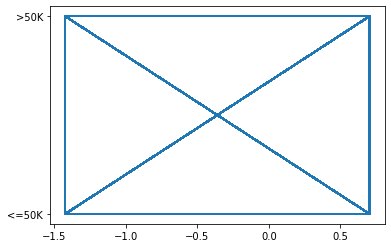

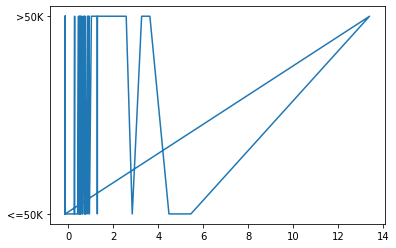

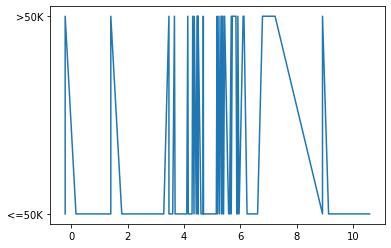

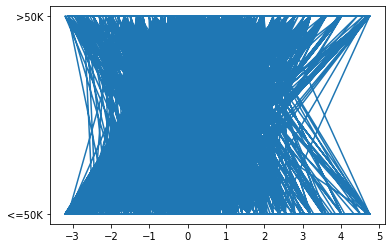

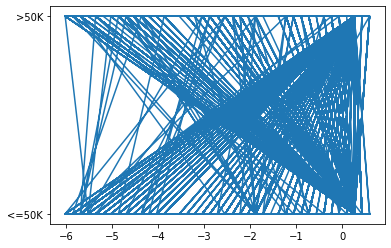

In [25]:
for col in x.columns.tolist():
    plt.plot(x[col], y)
    plt.show()

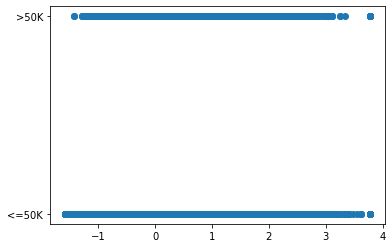

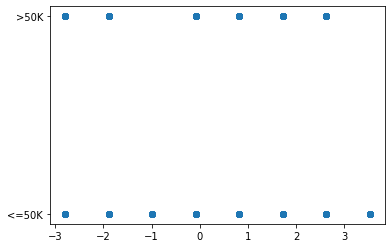

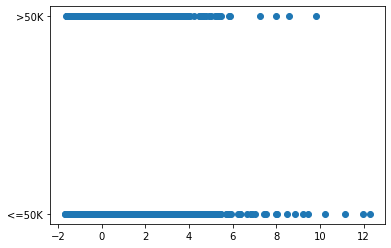

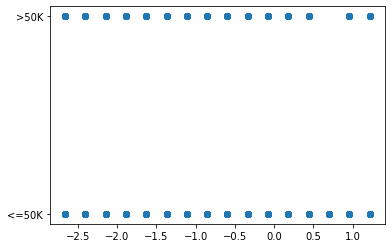

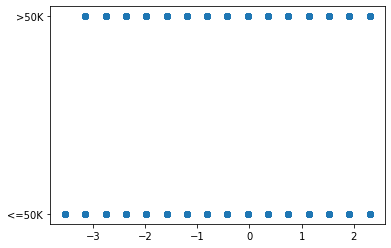

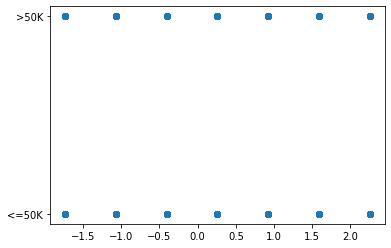

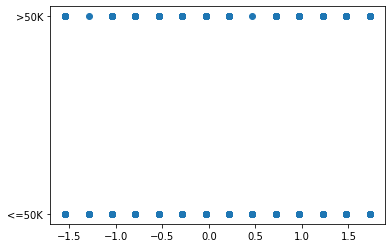

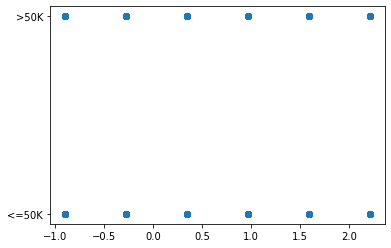

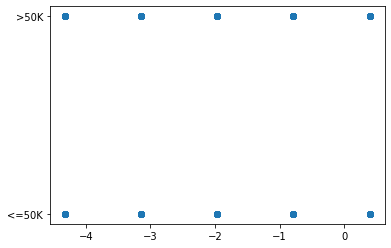

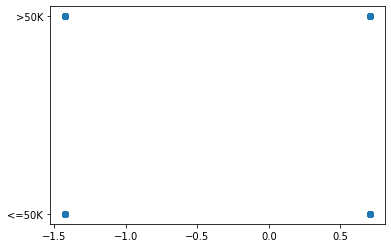

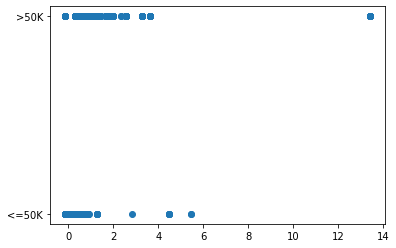

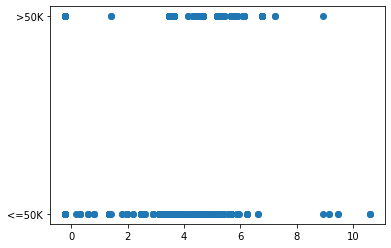

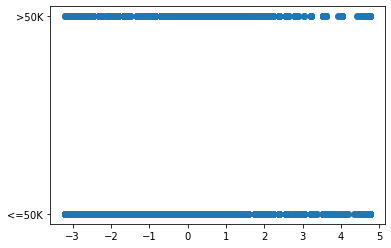

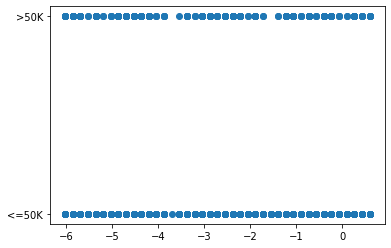

In [26]:
for col in x.columns.tolist():
    plt.scatter(x[col], y)
    plt.show()

### PCA

In [27]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [28]:
pcas = [i for i in range(8, 14 + 1)]
pcas

[8, 9, 10, 11, 12, 13, 14]

In [29]:
for pca in pcas:
    x_n = pd.DataFrame(PCA(n_components = pca).fit_transform(x), columns = [f'col {i}' for i in range(pca)])
    
    x_train, x_test, y_train, y_test = train_test_split(x_n, y, test_size = 0.25, random_state = 45)
    
    model = LogisticRegression()
    model.fit(x_train, y_train)
    
    print(f'Model with {pca} features')
    print(f'Train Accuracy: {accuracy_score(y_train, model.predict(x_train))}')
    print(f'Test Accuracy: {accuracy_score(y_test, model.predict(x_test))}')
    print()

Model with 8 features
Train Accuracy: 0.8035626535626536
Test Accuracy: 0.8127994103918438

Model with 9 features
Train Accuracy: 0.8193693693693693
Test Accuracy: 0.8258199238422799

Model with 10 features
Train Accuracy: 0.8196560196560196
Test Accuracy: 0.8255742537771773

Model with 11 features
Train Accuracy: 0.8216625716625716
Test Accuracy: 0.8282766244933055

Model with 12 features
Train Accuracy: 0.8219082719082719
Test Accuracy: 0.8288907996560619

Model with 13 features
Train Accuracy: 0.8246519246519246
Test Accuracy: 0.8276624493305491

Model with 14 features
Train Accuracy: 0.8227682227682228
Test Accuracy: 0.8287679646235107



In [30]:
# models with 12/13 features seem to have the best overall train and test accuracy